In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
TS_DATASET_FOLDER = os.path.join('..', 'dataset')
TS_PREPROC_FOLDER = os.path.join(TS_DATASET_FOLDER, 'preprocessed_traces')
DF_PREPROC_FILE = os.path.join(TS_PREPROC_FOLDER, 'preproc_ts.df')

TARGET = 'statement'
TRACES = 'syllables_02_STFT'

In [3]:
df = pd.read_csv(DF_PREPROC_FILE).drop(columns=['Unnamed: 0'])
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,path,sex,begin_s,end_s,fourier_coeffs,filtered_fourier_coeffs,syll_0_start_index,syll_1_start_index,syll_2_start_index,syll_3_start_index,syll_4_start_index,syll_5_start_index,syll_6_start_index,syll_7_start_index
0,speech,neutral,normal,kids,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.009833,2.252000,[3.5464764e-06 1.2311825e-02 1.1168651e-02 ......,[3.54647636e-06 1.23118088e-02 1.11685935e-02 ...,0,1128,2240,3200,4304,5208,5808,7448
1,speech,neutral,normal,kids,2nd,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.068500,2.294667,[5.7965517e-06 2.6200589e-02 2.5684062e-02 ......,[5.7965517e-06 2.6200553e-02 2.5683926e-02 ......,0,2008,3208,3880,4224,5112,5800,7352
2,speech,neutral,normal,dogs,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.012000,2.238500,[8.0130994e-06 1.2346960e-02 1.0677067e-02 ......,[8.0130994e-06 1.2346943e-02 1.0677010e-02 ......,0,2816,3352,3912,4296,5232,5880,7352
3,speech,neutral,normal,dogs,2nd,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.008833,2.187167,[3.9562583e-06 1.2152876e-02 1.6620096e-02 ......,[3.9562583e-06 1.2152858e-02 1.6620001e-02 ......,0,1664,2664,3208,3672,4840,5448,7064
4,speech,calm,normal,kids,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.023667,2.534167,[2.0638108e-06 2.0015759e-03 7.9706573e-04 ......,[2.0638108e-06 2.0015740e-03 7.9706300e-04 ......,0,2088,3584,4832,5800,6944,7560,9056


In [4]:
traces_dict = {}
files = os.listdir(TS_PREPROC_FOLDER)

for file in files:

    if file.endswith('.npy'):
        file_path = os.path.join(TS_PREPROC_FOLDER, file)
        # dictionary keys are the file names
        key = os.path.splitext(file)[0]
        # load array
        traces_dict[key] = np.load(file_path, allow_pickle=True)

traces_dict.keys()

dict_keys(['clean_trace', 'syllables_1_ts', 'std_phon_trace', 'syllables_02_sc', 'spectral_mode', 'syllables_3_ts', 'syllables_5_ts', 'syllables_0_ts', 'syllables_2_ts', 'spectral_centroid', 'syllables_fourier', 'traces_fourier', 'syllables_02_STFT', 'syllables_6_ts', 'full_stft', 'syllables_02', 'syllables_4_ts'])

In [5]:
traces = traces_dict[TRACES]
traces

array([[[ -1.10750406,  -0.97617206,  -0.60846191, ...,  -2.96828456,
          -4.09264335,  -4.62752101],
        [ -1.71518969,   0.2768606 ,   0.50267264, ...,  -4.6301232 ,
          -5.74553328,  -5.37555541],
        [ -3.57350099,  -0.77249355,  -1.28028925, ...,  -4.52111113,
          -2.94413849,  -4.39698533],
        ...,
        [ -5.19957355,   3.44166819,   3.29583123, ...,  -7.35062484,
          -6.82923573,  -6.70243931],
        [ -1.51982104,   1.09495361,   1.92227093, ...,  -6.21113319,
          -5.87425343,  -5.96493007],
        [  0.80617648,   2.44447754,   1.60927745, ...,  -4.34357419,
          -4.79593941,  -5.21561895]],

       [[ -1.59192782,   4.2667679 ,   7.49057712, ...,  -2.05886475,
          -3.83419424,  -0.90673264],
        [ -1.21993553,   4.44402547,   7.70416269, ...,   0.06632269,
          -0.38517134,  -0.30838017],
        [ -1.14266553,   4.28908099,   7.71060364, ...,   0.30864146,
          -1.93413312,   0.66485576],
        ...,


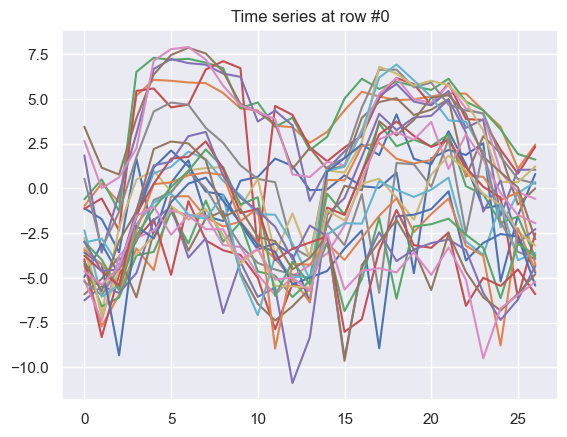

In [6]:
index = 0
plt.plot(traces[index])
plt.title(f'Time series at row #{index}')
plt.show()

In [7]:
# sort by actors
sorted_indices = df['actor'].argsort()
df = df.iloc[sorted_indices].reset_index(drop=True)

traces = traces[sorted_indices]

traces

array([[[ -1.10750406,  -0.97617206,  -0.60846191, ...,  -2.96828456,
          -4.09264335,  -4.62752101],
        [ -1.71518969,   0.2768606 ,   0.50267264, ...,  -4.6301232 ,
          -5.74553328,  -5.37555541],
        [ -3.57350099,  -0.77249355,  -1.28028925, ...,  -4.52111113,
          -2.94413849,  -4.39698533],
        ...,
        [ -5.19957355,   3.44166819,   3.29583123, ...,  -7.35062484,
          -6.82923573,  -6.70243931],
        [ -1.51982104,   1.09495361,   1.92227093, ...,  -6.21113319,
          -5.87425343,  -5.96493007],
        [  0.80617648,   2.44447754,   1.60927745, ...,  -4.34357419,
          -4.79593941,  -5.21561895]],

       [[ -1.79581864,   5.33930584,   4.28180878, ...,  -2.14126103,
          -2.79822749,  -3.28908618],
        [ -2.82857017,   5.46358645,   4.79957319, ...,  -0.32783943,
          -1.25164721,  -1.94051183],
        [ -3.07689682,   5.81201566,   5.85955317, ...,  -0.20043061,
          -0.61282466,  -0.62059815],
        ...,


In [8]:
from sklearn.model_selection import train_test_split

split_index = df[df['actor'] == 'actor_19'].index[0]

X_train = traces[:split_index]
X_test = traces[split_index:]

y_train = df[TARGET][:split_index].to_numpy()
y_test = df[TARGET][split_index:].to_numpy()

X_train_v, X_valid, y_train_v, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

X_train_v.shape, X_valid.shape, X_test.shape, y_train_v.shape, y_valid.shape, y_test.shape

((1462, 27, 27), (366, 27, 27), (624, 27, 27), (1462,), (366,), (624,))

# KNN using euclidean distance

In [9]:
from sklearn.metrics import accuracy_score
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
import optuna

# objective function to be minimized
"""
def objective_fun(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    distance = trial.suggest_categorical('distance', ['euclidean'])
    n_jobs = trial.suggest_int('n_jobs', -1, -1)

    knn = KNeighborsTimeSeriesClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        distance=distance,
        n_jobs=n_jobs
    )

    knn.fit(X_train_v, y_train_v)
    y_pred = knn.predict(X_valid)

    accuracy = accuracy_score(y_valid, y_pred)

    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective_fun, n_trials=100, n_jobs=-1)
"""

"\ndef objective_fun(trial):\n\n    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)\n    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])\n    distance = trial.suggest_categorical('distance', ['euclidean'])\n    n_jobs = trial.suggest_int('n_jobs', -1, -1)\n\n    knn = KNeighborsTimeSeriesClassifier(\n        n_neighbors=n_neighbors,\n        weights=weights,\n        distance=distance,\n        n_jobs=n_jobs\n    )\n\n    knn.fit(X_train_v, y_train_v)\n    y_pred = knn.predict(X_valid)\n\n    accuracy = accuracy_score(y_valid, y_pred)\n\n    return accuracy\n\n\nstudy = optuna.create_study(direction='maximize')\nstudy.optimize(objective_fun, n_trials=100, n_jobs=-1)\n"

In [10]:
#best_params = study.best_params
best_params = {'n_neighbors': 4, 'weights': 'distance', 'distance': 'euclidean', 'n_jobs': -1}

In [11]:
knn = KNeighborsTimeSeriesClassifier(**best_params)
knn.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(distance='euclidean', n_jobs=-1, n_neighbors=4,
                               weights='distance')

In [12]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        dogs       0.97      0.96      0.96       312
        kids       0.96      0.97      0.96       312

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



# KNN using DTW

In [13]:
# objective function to be minimized
"""
def objective_fun(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    distance = trial.suggest_categorical('distance', ['dtw'])
    n_jobs = trial.suggest_int('n_jobs', -1, -1)

    knn = KNeighborsTimeSeriesClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        distance=distance,
        n_jobs=n_jobs
    )

    knn.fit(X_train_v, y_train_v)
    y_pred = knn.predict(X_valid)

    accuracy = accuracy_score(y_valid, y_pred)

    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective_fun, n_trials=100, n_jobs=-1)
"""

"\ndef objective_fun(trial):\n\n    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)\n    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])\n    distance = trial.suggest_categorical('distance', ['dtw'])\n    n_jobs = trial.suggest_int('n_jobs', -1, -1)\n\n    knn = KNeighborsTimeSeriesClassifier(\n        n_neighbors=n_neighbors,\n        weights=weights,\n        distance=distance,\n        n_jobs=n_jobs\n    )\n\n    knn.fit(X_train_v, y_train_v)\n    y_pred = knn.predict(X_valid)\n\n    accuracy = accuracy_score(y_valid, y_pred)\n\n    return accuracy\n\n\nstudy = optuna.create_study(direction='maximize')\nstudy.optimize(objective_fun, n_trials=100, n_jobs=-1)\n"

In [14]:
#best_params = study.best_params
best_params = {'n_neighbors': 4, 'weights': 'distance', 'distance': 'dtw', 'n_jobs': -1}

In [15]:
knn = KNeighborsTimeSeriesClassifier(**best_params)
knn.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [16]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        dogs       0.97      0.96      0.96       312
        kids       0.96      0.97      0.97       312

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

